In [1]:
import os
import random
import sys
import numpy as np
import pandas as pd
import tensorflow as tf
SEED = 42

project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))

if project_root not in sys.path:
    sys.path.insert(0, project_root)
    print(f"Added '{project_root}' to Python's path")

import sys
print(sys.executable)
SEED = 42
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)
os.environ['PYTHONHASHSEED'] = str(SEED)
os.environ['TF_DETERMINISTIC_OPS'] = '1'
os.environ['TF_CUDNN_DETERMINISTIC'] = '1'

Added '/Users/williamglory/Desktop/IF SEM 6/ML/Tubes-2-IF3270/src/rnn' to Python's path
/Users/williamglory/Desktop/IF SEM 6/ML/Tubes-2-IF3270/.venv/bin/python


In [2]:
from preprocessing.text_vectorizer import create_text_vectorizer
from util import prepare_dataset



train_df = pd.read_csv("../dataset/train.csv") 
val_df = pd.read_csv("../dataset/valid.csv")

vectorizer = create_text_vectorizer(train_df['text'].values)
label_map = {'negative': 0, 'neutral': 1, 'positive': 2}
train_df['label'] = train_df['label'].map(label_map)
val_df['label'] = val_df['label'].map(label_map)
train_ds = prepare_dataset(train_df['text'].values, train_df['label'].values, vectorizer)
val_ds = prepare_dataset(val_df['text'].values, val_df['label'].values, vectorizer)

Membangun model...


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                               ┃ Output Shape                    ┃           Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)                   │ (None, 100)                     │                 0 │
├────────────────────────────────────────────┼─────────────────────────────────┼───────────────────┤
│ embedding (Embedding)                      │ (None, 100, 128)                │         1,280,000 │
├────────────────────────────────────────────┼─────────────────────────────────┼───────────────────┤
│ bidirectional_1 (Bidirectional)            │ (None, 100, 128)                │            24,704 │
├────────────────────────────────────────────┼─────────────────────────────────┼───────────────────┤
│ bidirectional_2 (Bidirectional)            │ (None, 128)                     │            24,704 │
├────────────────────────────────────────────┼─────────────────────────────────┼───────────────────┤
│ dropout (Dropout)                          │ (None, 128)                     │                 0 │
├────────────────────────────────────────────┼─────────────────────────────────┼───────────────────┤
│ output (Dense)                             │ (None, 3)                       │               387 │
└────────────────────────────────────────────┴─────────────────────────────────┴───────────────────┘

 Total params: 1,329,795 (5.07 MB)

 Trainable params: 1,329,795 (5.07 MB)

 Non-trainable params: 0 (0.00 B)


Memulai training model untuk 20 epoch (dengan Early Stopping patience=3)...
Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.3189 - loss: 1.2856 - val_accuracy: 0.3600 - val_loss: 1.0711
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.6066 - loss: 0.8884 - val_accuracy: 0.5100 - val_loss: 1.0165
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.8814 - loss: 0.4572 - val_accuracy: 0.5200 - val_loss: 1.0314
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9934 - loss: 0.1481 - val_accuracy: 0.5100 - val_loss: 1.1923
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 1.0000 - loss: 0.0417 - val_accuracy: 0.5000 - val_loss: 1.3149
Epoch 5: early stopping
Restoring model weights from the end of the best epoch: 2.

Training selesai.
Model saved to ./weights/weights_layers2_units64_bi1.weights.h5


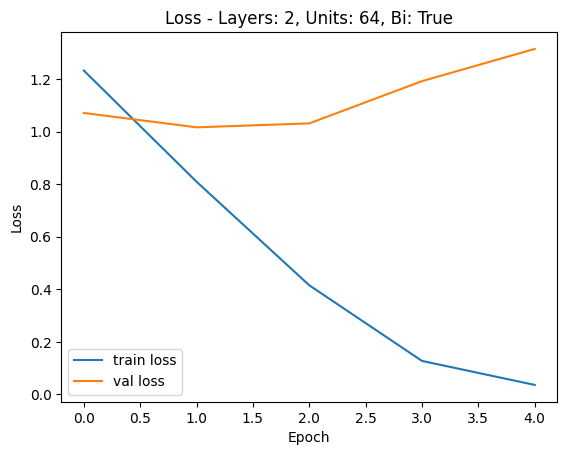

F1-score: 0.4748 → ./graph/loss_layers2_units64_bi1.png


2025-05-30 17:41:17.983896: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_14}}
2025-05-30 17:41:17.984129: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),

In [3]:
from matplotlib import pyplot as plt
import numpy as np
from sklearn.metrics import f1_score
from util import train_rnn_model


VOCAB_SIZE = 10000
SEQ_LENGTH = 100
NUM_CLASSES = train_df['label'].nunique()
rnn_units = 64
num_layers = 2
bidirectional = True
EMBEDDING_DIM = 128

trained_model, training_history = train_rnn_model(
    train_ds=train_ds,
    val_ds=val_ds,
    vocab_size=VOCAB_SIZE,
    embedding_dim=EMBEDDING_DIM,
    rnn_units=rnn_units,
    num_classes=NUM_CLASSES,
    sequence_length=SEQ_LENGTH,
    bidirectional=bidirectional,
    num_layers=num_layers,
    epochs=20,
    patience=3,
    verbose=1
)

trained_model.save_weights(
    f"./weights/weights_layers{num_layers}_units{rnn_units}_bi{int(bidirectional)}.weights.h5"
)

print(f"Model saved to ./weights/weights_layers{num_layers}_units{rnn_units}_bi{int(bidirectional)}.weights.h5")

plt.figure()
plt.plot(training_history.history['loss'], label='train loss')
plt.plot(training_history.history['val_loss'], label='val loss')
plt.title(f"Loss - Layers: {num_layers}, Units: {rnn_units}, Bi: {bidirectional}")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
filename = f"./graph/loss_layers{num_layers}_units{rnn_units}_bi{int(bidirectional)}.png"
plt.savefig(filename)
plt.show()


y_true, y_pred = [], []
for x_batch, y_batch in val_ds:
    preds = trained_model.predict(x_batch, verbose=0)
    y_true.extend(y_batch.numpy())
    y_pred.extend(np.argmax(preds, axis=1))
f1 = f1_score(y_true, y_pred, average='macro')
print(f"F1-score: {f1:.4f} → {filename}")

with open("./f1_log.csv", "a") as log_file:
    log_file.write(f"{num_layers},{rnn_units},{int(bidirectional)},{round(f1, 4)}\n")